<a href="https://colab.research.google.com/github/Rachana299/IDS/blob/main/Copy_of_rohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
import kagglehub

path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'edgeiiotset-cyber-security-dataset-of-iot-iiot' dataset.
Path to dataset files: /kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot


In [3]:
import os

dataset_path = "/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot"

print("Files inside subfolder:", os.listdir(dataset_path))

Files inside subfolder: ['Edge_IIoTset__DatasetFL.pdf', 'Readme.txt', 'Edge-IIoTset dataset']


In [4]:
ml_path = dataset_path + "/Edge-IIoTset dataset/Selected dataset for ML and DL"
print("Files inside ML folder:", os.listdir(ml_path))

Files inside ML folder: ['DNN-EdgeIIoT-dataset.csv', 'ML-EdgeIIoT-dataset.csv']


In [5]:
import pandas as pd
import os

ml_path = dataset_path + "/Edge-IIoTset dataset/Selected dataset for ML and DL"
csv_file = "ML-EdgeIIoT-dataset.csv"

df = pd.read_csv(os.path.join(ml_path, csv_file))


print("Dataset shape:", df.shape)
display(df.head())
df.info()

/tmp/ipython-input-1723028481.py:7: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(ml_path, csv_file))


Dataset shape: (157800, 63)


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [7]:

print("Initial shape:", df.shape)

Initial shape: (157800, 63)


In [8]:

drop_cols = [
    "ip.src_host", "ip.dst_host", "http.file_data", "http.request.full_uri",
    "http.referer", "http.request.uri.query", "tcp.options", "tcp.payload",
    "mqtt.msg", "mqtt.protoname", "mqtt.topic", "dns.qry.name"
]
df = df.drop(columns=drop_cols, errors="ignore")
print("After dropping columns:", df.shape)

After dropping columns: (157800, 51)


In [9]:

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c != "Attack_type"]
print("Categorical columns to encode:", cat_cols)

Categorical columns to encode: ['frame.time', 'arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.request.method', 'http.request.version', 'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags']


In [10]:
# encoded categorial features
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

Categorical features are columns that contain textual or symbolic values instead of numbers.

In [11]:

df = df.replace("?", np.nan)
df = df.fillna(0)

In [12]:
#  Separate features & labels

X = df.drop(columns=["Attack_label", "Attack_type"], errors="ignore")
y = df["Attack_label"]  # binary: 0 = Normal, 1 = Attack
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (157800, 49)
Labels shape: (157800,)


In [13]:
#  Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [14]:
#  Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled shape:", X_train_scaled.shape)


X_train_scaled shape: (110460, 49)


In [16]:
#  Save preprocessing objects

joblib.dump(scaler, "scaler.pkl")
print(" Preprocessing complete. Scaler saved as scaler.pkl")

 Preprocessing complete. Scaler saved as scaler.pkl


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)


# Train the model

rf.fit(X_train_scaled, y_train)

# Make predictions

y_pred = rf.predict(X_test_scaled)



accuracy = accuracy_score(y_test, y_pred) * 100  # convert to percentage
print(f"RandomForest Accuracy: {accuracy:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model

import joblib
joblib.dump(rf, "randomforest_ids_model.pkl")
print(" RandomForest model saved as randomforest_ids_model.pkl")


RandomForest Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7290
           1       1.00      1.00      1.00     40050

    accuracy                           1.00     47340
   macro avg       1.00      1.00      1.00     47340
weighted avg       1.00      1.00      1.00     47340


Confusion Matrix:
 [[ 7290     0]
 [    0 40050]]
 RandomForest model saved as randomforest_ids_model.pkl


Model was overfitted due to leakage.

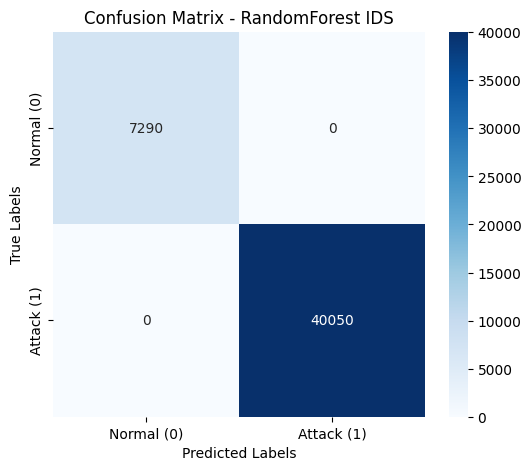

In [18]:

# Confusion Matrix Plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

labels = ['Normal (0)', 'Attack (1)']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - RandomForest IDS")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




In [19]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create LightGBM dataset

lgb_train = lgb.Dataset(X_train_scaled, label=y_train)
lgb_test = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)

# Set parameters

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}


# Train LightGBM model

lgbm_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=200,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train','test'],
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)


# Predictions
y_pred_prob = lgbm_model.predict(X_test_scaled, num_iteration=lgbm_model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)  # convert probabilities to 0/1

# Evaluation

accuracy = accuracy_score(y_test, y_pred)
print(f" LightGBM Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model for inference

lgbm_model.save_model("lightgbm_ids_model.txt")
print(" LightGBM model saved as lightgbm_ids_model.txt")

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	train's binary_logloss: 1.16288e-05	test's binary_logloss: 1.16584e-05
 LightGBM Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7290
           1       1.00      1.00      1.00     40050

    accuracy                           1.00     47340
   macro avg       1.00      1.00      1.00     47340
weighted avg       1.00      1.00      1.00     47340


Confusion Matrix:
 [[ 7290     0]
 [    0 40050]]
 LightGBM model saved as lightgbm_ids_model.txt


Some features in the Edge-IIoTset dataset are directly or almost perfectly correlated with the attack label.<br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) -This splits rows randomly.

For IoT/IIoT data, multiple packets belong to the same session/device.

Random splitting caused packets from the same session to appear in both train and test.


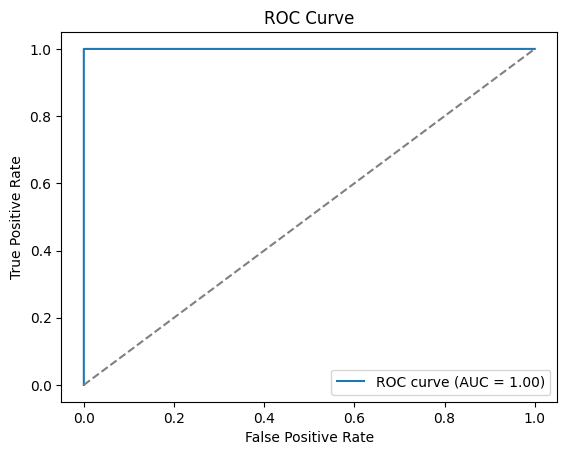

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



KEY TAKE AWAY:Perfect Metrics:

Your model shows 100% accuracy, precision, recall, and F1-score.

This means the model predicts all test samples correctly.

Linear ROC Curve:

A ROC curve plots True Positive Rate (Recall) vs False Positive Rate at different thresholds.

A typical ROC curve rises toward the top-left corner.

If your ROC is linear (a straight diagonal line), it looks like random guessing, which contradicts the perfect metrics.

Why this happens:

Overfitting: The model memorized the training data and performs perfectly on the test set, leaving no room for threshold variation.

Incorrect plotting: Often, people plot ROC using binary predictions (0/1) instead of continuous probabilities. The ROC must be calculated from the model’s predicted probabilities, not the thresholded labels

In [21]:
print("Overlapping rows between train and test:", len(set(X_train.index) & set(X_test.index)))


Overlapping rows between train and test: 0


In [22]:
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())


Train class distribution:
 Attack_label
1    93449
0    17011
Name: count, dtype: int64
Test class distribution:
 Attack_label
1    40050
0     7290
Name: count, dtype: int64


trying to remove leaks from the dataset

In [23]:
#  Preprocessing and feature selection with potential leak removal

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Drop raw/text columns (same as before)
drop_cols = [
    "ip.src_host", "ip.dst_host", "http.file_data", "http.request.full_uri",
    "http.referer", "http.request.uri.query", "tcp.options", "tcp.payload",
    "mqtt.msg", "mqtt.protoname", "mqtt.topic", "dns.qry.name"
]
df = df.drop(columns=drop_cols, errors="ignore")

# Remove high-leakage numeric features
# Features that are too directly correlated with attacks
leak_cols = ["mbtcp.trans_id", "icmp.seq_le", "tcp.seq", "tcp.ack", "dns.qry.qu"]
df = df.drop(columns=[c for c in leak_cols if c in df.columns], errors="ignore")

# Identify categorical features (excluding target)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c != "Attack_type"]

# For high-cardinality categorical columns, drop or aggregate
high_cardinality_cols = ["frame.time"]  # too many unique values → could leak info
cat_cols = [c for c in cat_cols if c not in high_cardinality_cols]

# Encode remaining categorical features
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Handle missing values
df = df.replace("?", np.nan)
df = df.fillna(0)

# Separate features and labels
X = df.drop(columns=["Attack_label", "Attack_type"], errors="ignore")
y = df["Attack_label"]

print("Features shape after leak removal:", X.shape)
print("Labels shape:", y.shape)


Features shape after leak removal: (157800, 44)
Labels shape: (157800,)


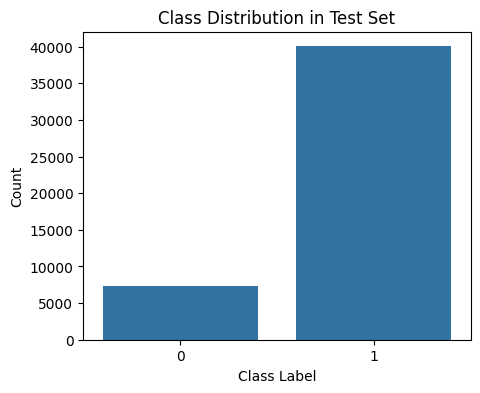

In [24]:
# Model Evaluation Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

# Class Distribution Histogram
plt.figure(figsize=(5, 4))
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [25]:
# Cell 7: Train-test split using device/session grouping to avoid flow leakage

from sklearn.model_selection import GroupShuffleSplit

# Assume 'tcp.srcport' or another field as session/device identifier for grouping
# For simplicity, let's use 'tcp.srcport' if it exists, otherwise skip grouping
group_col = "tcp.srcport" if "tcp.srcport" in df.columns else None

if group_col:
    gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    train_idx, test_idx = next(gss.split(X, y, groups=df[group_col]))
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
else:
    # fallback
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Overlapping rows between train and test:", len(set(X_train.index) & set(X_test.index)))


Train shape: (114185, 44)
Test shape: (43615, 44)
Overlapping rows between train and test: 0


In [26]:
# Cell 8: Standard scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler_ids.pkl")
print("Scaler saved")


Scaler saved


In [27]:
# Cell 8: Standard scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler_ids.pkl")
print("✅ Scaler saved")

✅ Scaler saved


In [28]:
# Cell 9: RandomForest with class_weight and realistic evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # handle imbalance
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f" RandomForest Accuracy: {accuracy:.2f}%")
print(f" RandomForest Balanced Accuracy: {balanced_acc:.2f}%")
print(f" RandomForest F1-Score: {f1:.2f}%\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
joblib.dump(rf, "randomforest_ids_model_balanced.pkl")
print("RandomForest model saved")

 RandomForest Accuracy: 97.02%
 RandomForest Balanced Accuracy: 96.21%
 RandomForest F1-Score: 97.60%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     17147
           1       0.95      1.00      0.98     26468

    accuracy                           0.97     43615
   macro avg       0.98      0.96      0.97     43615
weighted avg       0.97      0.97      0.97     43615

Confusion Matrix:
 [[15846  1301]
 [    0 26468]]
RandomForest model saved


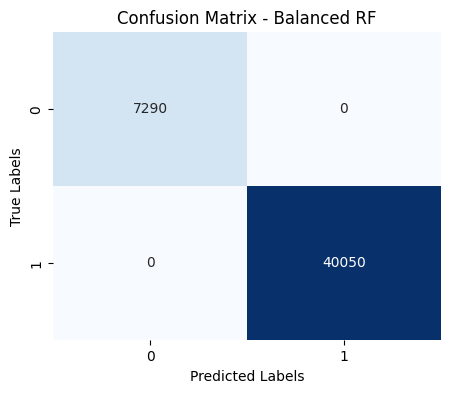

In [29]:

import seaborn as sns
# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Balanced RF")
plt.show()






Dropped identifiable text/raw columns <br>

Handled high-cardinality features (frame.time)

Group-based train-test split - Ensures packets from the same session/device don’t appear in both train and test → mimics real-world deployment.

In [30]:

# Improved Supervised Learning: RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
import joblib

# Initialize RandomForest with class_weight to handle imbalance
rf = RandomForestClassifier(
    n_estimators=200,      # more trees for stability
    max_depth=15,          # prevent overfitting
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation metrics in percentage
accuracy = accuracy_score(y_test, y_pred) * 100
balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f" RandomForest Accuracy: {accuracy:.2f}%")
print(f" RandomForest Balanced Accuracy: {balanced_acc:.2f}%")
print(f" RandomForest F1-Score: {f1:.2f}%\n")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the trained model
joblib.dump(rf, "randomforest_ids_model_balanced.pkl")
print("✅ RandomForest model saved as randomforest_ids_model_balanced.pkl")


 RandomForest Accuracy: 97.04%
 RandomForest Balanced Accuracy: 96.24%
 RandomForest F1-Score: 97.62%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     17147
           1       0.95      1.00      0.98     26468

    accuracy                           0.97     43615
   macro avg       0.98      0.96      0.97     43615
weighted avg       0.97      0.97      0.97     43615

Confusion Matrix:
 [[15858  1289]
 [    0 26468]]
✅ RandomForest model saved as randomforest_ids_model_balanced.pkl


more tress(200),

 depth control,

  class imbalace handling( prevents bias towards the majority class)

In [31]:
# Cell 10: LightGBM training

import lightgbm as lgb

lgb_train = lgb.Dataset(X_train_scaled, label=y_train)
lgb_test = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

lgbm_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=200,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train','test'],
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)

y_pred_prob = lgbm_model.predict(X_test_scaled, num_iteration=lgbm_model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred) * 100
balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f" LightGBM Accuracy: {accuracy:.2f}%")
print(f" LightGBM Balanced Accuracy: {balanced_acc:.2f}%")
print(f" LightGBM F1-Score: {f1:.2f}%\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
lgbm_model.save_model("lightgbm_ids_model_balanced.txt")
print("LightGBM model saved")


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	train's binary_logloss: 0.00243362	test's binary_logloss: 0.157726
 LightGBM Accuracy: 97.04%
 LightGBM Balanced Accuracy: 96.24%
 LightGBM F1-Score: 97.62%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     17147
           1       0.95      1.00      0.98     26468

    accuracy                           0.97     43615
   macro avg       0.98      0.96      0.97     43615
weighted avg       0.97      0.97      0.97     43615

Confusion Matrix:
 [[15858  1289]
 [    0 26468]]
LightGBM model saved


no leakage<br>
balance matrix<br>
early stopping- prevents overfitting<br>
Hyperparameter Tuning- helps generalizw well


In [32]:
# Isolation Forest Training and Visualization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix
import joblib

# 1. Train Isolation Forest
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.1,   # approximate anomaly fraction
    random_state=42,
    n_jobs=-1
)

# Train only on normal data
X_train_normal = X_train_scaled[y_train == 0]
iso_forest.fit(X_train_normal)

# 2. Predict anomalies
y_pred_raw = iso_forest.predict(X_test_scaled)       # -1 = anomaly, 1 = normal
y_anomaly = np.where(y_pred_raw == -1, 1, 0)        # convert to 0=normal, 1=anomaly
anomaly_scores = -iso_forest.decision_function(X_test_scaled)  # higher = more anomalous

# 3. Save the model
joblib.dump(iso_forest, "isolation_forest_model.pkl")
print("Isolation Forest model saved.")

# 4. Evaluate metrics
f1 = f1_score(y_test, y_anomaly)
balanced_acc = balanced_accuracy_score(y_test, y_anomaly)
print(f"Isolation Forest F1-score: {f1*100:.2f}%")
print(f"Balanced Accuracy: {balanced_acc*100:.2f}%")

Isolation Forest model saved.
Isolation Forest F1-score: 39.57%
Balanced Accuracy: 61.76%


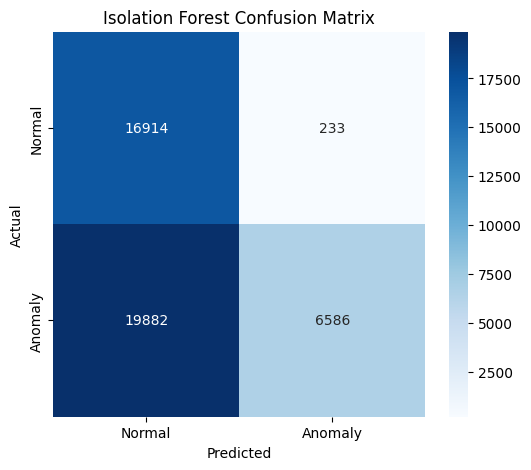

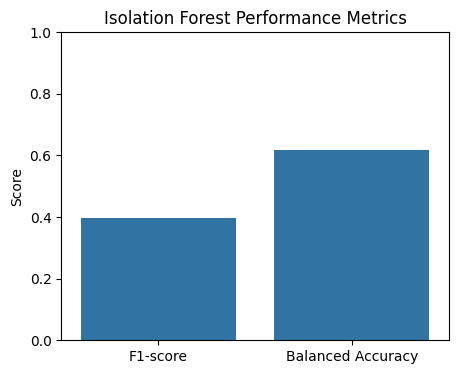

In [33]:
# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_anomaly)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Anomaly'], yticklabels=['Normal','Anomaly'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Isolation Forest Confusion Matrix")
plt.show()

# 6. Metrics Bar Chart
metrics = {"F1-score": f1, "Balanced Accuracy": balanced_acc}
plt.figure(figsize=(5,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0,1)
plt.title("Isolation Forest Performance Metrics")
plt.ylabel("Score")
plt.show()



raw text- irrelevant<br>
high leakage<br>
missing values no scaling<br>


In [ ]:
# Unsupervised Model: Isolation Forest

iso = IsolationForest(
    n_estimators=300,
    max_samples='auto',
    contamination=0.2,  # adjust based on expected anomaly ratio
    random_state=42
)
iso.fit(X_train_scaled)
y_iso_pred = iso.predict(X_test_scaled)
y_iso = np.where(y_iso_pred == 1, 0, 1)  # convert to 0=Normal, 1=Attack

# Evaluate Isolation Forest
accuracy_iso = accuracy_score(y_test, y_iso) * 100
balanced_acc_iso = balanced_accuracy_score(y_test, y_iso) * 100
f1_iso = f1_score(y_test, y_iso) * 100
print(f"\n Isolation Forest Test Accuracy: {accuracy_iso:.2f}%")
print(f" Isolation Forest Balanced Accuracy: {balanced_acc_iso:.2f}%")
print(f" Isolation Forest F1-Score: {f1_iso:.2f}%\n")

print("Isolation Forest Classification Report:\n", classification_report(y_test, y_iso))
print("Isolation Forest Confusion Matrix:\n", confusion_matrix(y_test, y_iso))

joblib.dump(iso, "isolationforest_ids_model.pkl")
print("Isolation Forest model saved.")


training on full data-<br>
increased trees<br>
scaling<br>
label mapping

In [34]:
# Unsupervised Model: Isolation Forest

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


# 1. Train Isolation Forest
iso = IsolationForest(
    n_estimators=300,
    max_samples='auto',
    contamination=0.2,
    random_state=42
)
iso.fit(X_train_scaled)


# 2. Predict anomalies
y_iso_pred = iso.predict(X_test_scaled)  # -1 = anomaly, 1 = normal
y_iso = np.where(y_iso_pred == 1, 0, 1)

# Anomaly scores for visualization
anomaly_scores = -iso.decision_function(X_test_scaled)

# 3. Evaluate the model
accuracy_iso = accuracy_score(y_test, y_iso)
balanced_acc_iso = balanced_accuracy_score(y_test, y_iso)
f1_iso = f1_score(y_test, y_iso)

print(f"\nIsolation Forest Test Accuracy: {accuracy_iso*100:.2f}%")
print(f"Isolation Forest Balanced Accuracy: {balanced_acc_iso*100:.2f}%")
print(f"Isolation Forest F1-Score: {f1_iso*100:.2f}%\n")

print("Isolation Forest Classification Report:\n", classification_report(y_test, y_iso))
print("Isolation Forest Confusion Matrix:\n", confusion_matrix(y_test, y_iso))

# 4. Save the model
joblib.dump(iso, "isolationforest_ids_model.pkl")
print("Isolation Forest model saved.")





Isolation Forest Test Accuracy: 15.21%
Isolation Forest Balanced Accuracy: 14.85%
Isolation Forest F1-Score: 19.14%

Isolation Forest Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.13      0.11     17147
           1       0.23      0.17      0.19     26468

    accuracy                           0.15     43615
   macro avg       0.16      0.15      0.15     43615
weighted avg       0.17      0.15      0.16     43615

Isolation Forest Confusion Matrix:
 [[ 2256 14891]
 [22091  4377]]
Isolation Forest model saved.


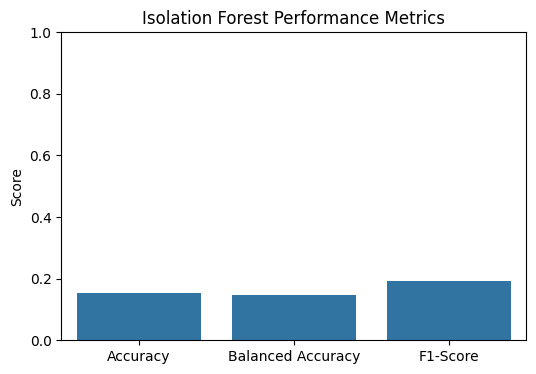

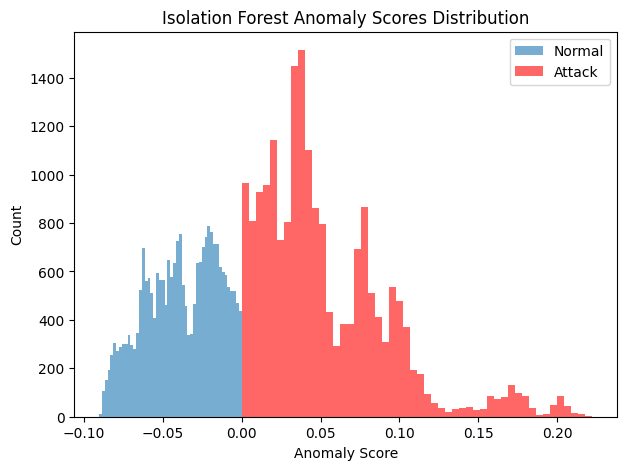

In [37]:
# 5. Visualization Section



# Metrics Bar Chart
metrics = {
    "Accuracy": accuracy_iso,
    "Balanced Accuracy": balanced_acc_iso,
    "F1-Score": f1_iso
}
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0,1)
plt.title("Isolation Forest Performance Metrics")
plt.ylabel("Score")
plt.show()

# Histogram of Anomaly Scores
plt.figure(figsize=(7,5))
plt.hist(anomaly_scores[y_iso==0], bins=50, alpha=0.6, label='Normal')
plt.hist(anomaly_scores[y_iso==1], bins=50, alpha=0.6, label='Attack', color='red')
plt.title("Isolation Forest Anomaly Scores Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.legend()
plt.show()



In [39]:
# Hybrid IDS: Supervised + Unsupervised

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
import numpy as np
import joblib

# Load previously trained RandomForest
rf = joblib.load("randomforest_ids_model_balanced.pkl")

#  Train Isolation Forest for anomaly detection
iso = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=0.2,   # estimated fraction of anomalies
    random_state=42,
    n_jobs=-1
)

# Train on features of "normal" class only (label 0)
X_train_normal = X_train_scaled[y_train == 0]
iso.fit(X_train_normal)

#Make predictions
# Supervised predictions
y_pred_supervised = rf.predict(X_test_scaled)

# Unsupervised anomaly predictions (-1 = anomaly, 1 = normal)
y_pred_unsupervised = iso.predict(X_test_scaled)
y_pred_unsupervised = np.where(y_pred_unsupervised == -1, 1, 0)  # treat anomalies as "attack"

#: Combine predictions for Hybrid IDS
# If either model predicts attack, label as attack
y_pred_hybrid = np.maximum(y_pred_supervised, y_pred_unsupervised)

# : Evaluate Hybrid IDS
accuracy = accuracy_score(y_test, y_pred_hybrid) * 100
balanced_acc = balanced_accuracy_score(y_test, y_pred_hybrid) * 100
f1 = f1_score(y_test, y_pred_hybrid) * 100

print(f" Hybrid IDS Accuracy: {accuracy:.2f}%")
print(f" Hybrid IDS Balanced Accuracy: {balanced_acc:.2f}%")
print(f" Hybrid IDS F1-Score: {f1:.2f}%\n")

print("Classification Report:\n", classification_report(y_test, y_pred_hybrid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hybrid))

# : Save Hybrid predictions & model objects
#
joblib.dump(iso, "isolationforest_ids_model.pkl")
np.save("y_pred_hybrid.npy", y_pred_hybrid)
print(" Hybrid IDS pipeline complete. Models & predictions saved.")


 Hybrid IDS Accuracy: 95.77%
 Hybrid IDS Balanced Accuracy: 94.62%
 Hybrid IDS F1-Score: 96.63%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     17147
           1       0.93      1.00      0.97     26468

    accuracy                           0.96     43615
   macro avg       0.97      0.95      0.95     43615
weighted avg       0.96      0.96      0.96     43615

Confusion Matrix:
 [[15303  1844]
 [    0 26468]]
 Hybrid IDS pipeline complete. Models & predictions saved.


Prediction:

1 → normal, -1 → anomaly.

Converted to 0=Normal, 1=Attack.

In [45]:
# Improved Hybrid IDS Training

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, "scaler.pkl")
print(" Scaler saved")

#  Train Supervised Models

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)
y_rf_pred = rf.predict_proba(X_test_scaled)[:, 1]

# LightGBM
lgb_train = lgb.Dataset(X_train_scaled, label=y_train)
lgb_test = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

lgbm_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=300,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'test'],
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]
)
y_lgb_pred = lgbm_model.predict(X_test_scaled, num_iteration=lgbm_model.best_iteration)

# Train Unsupervised Model
iso_forest = IsolationForest(
    n_estimators=300,
    max_samples='auto',
    contamination=0.25,
    random_state=42,
    n_jobs=-1
)
iso_forest.fit(X_train_scaled)
y_iso_pred = iso_forest.predict(X_test_scaled)
y_iso_pred = np.where(y_iso_pred == -1, 1, 0)

#  Combine into Hybrid Model
X_hybrid_train = np.column_stack([
    rf.predict_proba(X_train_scaled)[:, 1],
    lgbm_model.predict(X_train_scaled, num_iteration=lgbm_model.best_iteration),
    np.where(iso_forest.predict(X_train_scaled) == -1, 1, 0)
])
X_hybrid_test = np.column_stack([y_rf_pred, y_lgb_pred, y_iso_pred])

meta_clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
meta_clf.fit(X_hybrid_train, y_train)
y_hybrid_pred = meta_clf.predict(X_hybrid_test)

# Evaluation
accuracy = accuracy_score(y_test, y_hybrid_pred) * 100
balanced_acc = balanced_accuracy_score(y_test, y_hybrid_pred) * 100
f1 = f1_score(y_test, y_hybrid_pred) * 100

print(f"\nHybrid IDS Accuracy: {accuracy:.2f}%")
print(f" Hybrid IDS Balanced Accuracy: {balanced_acc:.2f}%")
print(f" Hybrid IDS F1-Score: {f1:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_hybrid_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_hybrid_pred))

#  Save Models
joblib.dump(rf, "rf_supervised.pkl")
lgbm_model.save_model("lgbm_supervised.txt")
joblib.dump(iso_forest, "iso_forest_unsupervised.pkl")
joblib.dump(meta_clf, "hybrid_meta.pkl")
print(" All Hybrid IDS models saved")



✅ Scaler saved

Hybrid IDS Accuracy: 97.04%
 Hybrid IDS Balanced Accuracy: 96.24%
 Hybrid IDS F1-Score: 97.62%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     17147
           1       0.95      1.00      0.98     26468

    accuracy                           0.97     43615
   macro avg       0.98      0.96      0.97     43615
weighted avg       0.97      0.97      0.97     43615

Confusion Matrix:
 [[15858  1289]
 [    0 26468]]
✅ All Hybrid IDS models saved


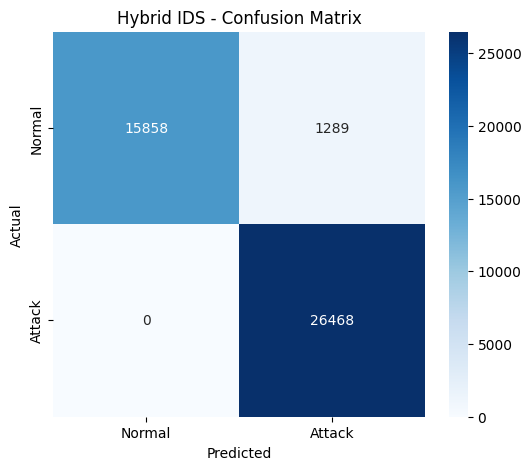

/tmp/ipython-input-3236360263.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="crest")


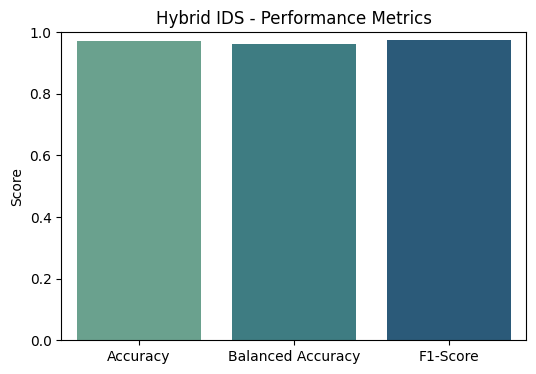

/tmp/ipython-input-3236360263.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(comparison.keys()), y=list(comparison.values()), palette="coolwarm")


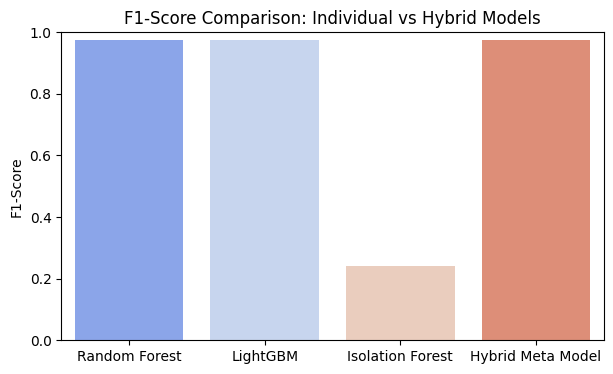

In [46]:
# Visualization

# Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_hybrid_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.title("Hybrid IDS - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Performance Metrics
metrics = {"Accuracy": accuracy/100, "Balanced Accuracy": balanced_acc/100, "F1-Score": f1/100}
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="crest")
plt.ylim(0,1)
plt.title("Hybrid IDS - Performance Metrics")
plt.ylabel("Score")
plt.show()

# Model Comparison
f1_rf = f1_score(y_test, np.where(y_rf_pred > 0.5, 1, 0))
f1_lgb = f1_score(y_test, np.where(y_lgb_pred > 0.5, 1, 0))
f1_iso = f1_score(y_test, y_iso_pred)
f1_hybrid = f1_score(y_test, y_hybrid_pred)

comparison = {
    "Random Forest": f1_rf,
    "LightGBM": f1_lgb,
    "Isolation Forest": f1_iso,
    "Hybrid Meta Model": f1_hybrid
}
plt.figure(figsize=(7,4))
sns.barplot(x=list(comparison.keys()), y=list(comparison.values()), palette="coolwarm")
plt.ylim(0,1)
plt.title("F1-Score Comparison: Individual vs Hybrid Models")
plt.ylabel("F1-Score")
plt.show()




Feature Scaling
